### 1. Build a classifier on MNIST dataset with 97% accuracy on test data.

In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
## Loading the MNIST dataset

mnist = fetch_openml('mnist_784', version=1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X, y = mnist["data"], mnist["target"]

# features
print(X.shape)

# labels
print(y.shape)

(70000, 784)
(70000,)


In [6]:
## Train test split
X_train, X_test, y_train, y_test = X.iloc[:60000], X.iloc[60000:], y[:60000], y[60000:]

## Training a KNN classifier on MNIST dataset
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

## Computing accuracy via cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_clf, X_train, y_train, cv=3, verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.968) total time=  55.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   55.7s remaining:    0.0s


[CV] END ................................ score: (test=0.967) total time=  46.6s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.7min remaining:    0.0s


[CV] END ................................ score: (test=0.968) total time=  46.6s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.5min finished


In [7]:
## Mean accuracy

scores.mean()

0.9674166666666667

=> We're already getting some fair amount of accuracy. Let's increase it even more by tweaking some parameters via GridSearchCV.

In [8]:
## Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Params to be hypertuned
grid_params = {
    "n_neighbors": [3, 4, 5],
    "weights": ['uniform', 'distance']
}

# Grid Search
grid_search = GridSearchCV(param_grid=grid_params, estimator=knn_clf, cv=3, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  43.6s
[CV 2/3] END ....n_neighbors=3, weights=uniform;, score=0.968 total time=  45.7s
[CV 3/3] END ....n_neighbors=3, weights=uniform;, score=0.968 total time=  48.4s
[CV 1/3] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  44.0s
[CV 2/3] END ...n_neighbors=3, weights=distance;, score=0.969 total time=  45.0s
[CV 3/3] END ...n_neighbors=3, weights=distance;, score=0.969 total time=  44.9s
[CV 1/3] END ....n_neighbors=4, weights=uniform;, score=0.966 total time=  52.6s
[CV 2/3] END ....n_neighbors=4, weights=uniform;, score=0.966 total time=  51.0s
[CV 3/3] END ....n_neighbors=4, weights=uniform;, score=0.967 total time=  51.7s
[CV 1/3] END ...n_neighbors=4, weights=distance;, score=0.971 total time=  49.6s
[CV 2/3] END ...n_neighbors=4, weights=distance;, score=0.970 total time=  50.0s
[CV 3/3] END ...n_neighbors=4, weights=distance;,

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [9]:
## best params
best_params = grid_search.best_params_
print("best_params: ", best_params)

## best estimator
best_knn_clf = grid_search.best_estimator_
best_knn_clf

best_params:  {'n_neighbors': 4, 'weights': 'distance'}


KNeighborsClassifier(n_neighbors=4, weights='distance')

In [8]:
# KNN Classifier w best params

best_knn_clf = KNeighborsClassifier(n_neighbors=4, weights="distance")
best_knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [9]:
# Computing accuracy of the best KNN clf on test data

best_knn_clf.score(X_test, y_test)

0.9714

=> Woa, we got what we wanted, 97% accuracy on the test data,

# 2. Tackle the `titanic` dataset.

The goal is to predict whether or not a passenger survived based on attributes such as their age, sex, passenger class, where they embarked and so on.

In [1]:
import pandas as pd
import numpy as np
import os
import urllib.request
from sklearn.datasets import fetch_openml

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Load the Titanic dataset
titanic = fetch_openml('titanic', version=1)

# features
X = titanic.data

# target
y = titanic.target.astype(float)

In [3]:
## Now, without paying any heed to any other notion, put aside the test data

from sklearn.model_selection import train_test_split

# separated the 25% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## 2.1 About the dataset

In [4]:
## About the dataset

print(titanic.DESCR)

**Author**: Frank E. Harrell Jr., Thomas Cason  
**Source**: [Vanderbilt Biostatistics](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html)  
**Please cite**:   

The original Titanic dataset, describing the survival status of individual passengers on the Titanic. The titanic data does not contain information from the crew, but it does contain actual ages of half of the passengers. The principal source for data about Titanic passengers is the Encyclopedia Titanica. The datasets used here were begun by a variety of researchers. One of the original sources is Eaton & Haas (1994) Titanic: Triumph and Tragedy, Patrick Stephens Ltd, which includes a passenger list created by many researchers and edited by Michael A. Findlay.

Thomas Cason of UVa has greatly updated and improved the titanic data frame using the Encyclopedia Titanica and created the dataset here. Some duplicate passengers have been dropped, many errors corrected, many missing ages filled in, and new variable

### 2.1.1 Attributes

- **Survived:** that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
- **Pclass:** passenger class.
- **Name, Sex, Age:** self-explanatory.
- **SibSp:** how many siblings & spouses of the passenger aboard the Titanic.
- **Parch:** how many children & parents of the passenger aboard the Titanic.
- **Ticket:** ticket id.
- **Fare:** price paid (in pounds).
- **Cabin:** passenger's cabin number.
- **Embarked:** where the passenger embarked the Titanic.

In [5]:
## Let's configure the features and label altogether for now

df = pd.DataFrame(np.c_[X_train, y_train], columns=list(X_train.columns)+["survived"])
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,3.0,"Rekic, Mr. Tido",male,38.0,0.0,0.0,349249,7.8958,None,S,None,NaN,None,0.0
1,3.0,"Boulos, Master. Akar",male,6.0,1.0,1.0,2678,15.2458,None,C,None,NaN,"Syria Kent, ON",0.0
2,1.0,"Taussig, Mr. Emil",male,52.0,1.0,1.0,110413,79.65,E67,S,None,NaN,"New York, NY",0.0
3,1.0,"Straus, Mr. Isidor",male,67.0,1.0,0.0,PC 17483,221.7792,C55 C57,S,None,96.0,"New York, NY",0.0
4,3.0,"Rosblom, Mr. Viktor Richard",male,18.0,1.0,1.0,370129,20.2125,None,S,None,NaN,None,0.0


In [6]:
## Shape of the dataset

df.shape

(981, 14)

## 2.2 Handling Features

### 2.2.1 Dropping the redundant features right off the bat

In [7]:
df.drop(columns=["name", "ticket"], inplace=True)

df.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'embarked',
       'boat', 'body', 'home.dest', 'survived'],
      dtype='object')

### 2.2.2 Looking at the features I'm having second thoughts about:

`cabin`, `embarked`, `boat`, `body`, `home.dest`

In [8]:
## `cabin` feature

print("Number of unique entries: ", df["cabin"].nunique())
df["cabin"].value_counts()

Number of unique entries:  154


G6                 5
B57 B59 B63 B66    5
C22 C26            4
C23 C25 C27        4
F2                 3
                  ..
D34                1
B3                 1
F G73              1
E31                1
D56                1
Name: cabin, Length: 154, dtype: int64

**=>** Not gonna be of any use.

In [9]:
## `embarked` feature

print("Number of unique entries: ", df["embarked"].nunique())
df["embarked"].value_counts()

Number of unique entries:  3


S    688
C    197
Q     95
Name: embarked, dtype: int64

**Embarked** implies where the traveler mounted from. There are three possible values for Embark — `Southampton`, `Cherbourg`, and `Queenstown`.

**=>** It indeeds seems like an important feature.

In [10]:
## `body` feature

print("Missing % in `body` feature: ", df["body"].isna().sum()/(df.body.shape[0]))

Missing % in `body` feature:  0.9051987767584098


**=>** Like seriously! What info we're gonna derive it from anyhow?? Destined to be dropped!

In [11]:
## `boat` feature

print("`boat` dtype: ", df.boat.dtype)
print("Missing % in `boat` feature: ", df["boat"].isna().sum()/(df.boat.shape[0]))

`boat` dtype:  object
Missing % in `boat` feature:  0.6442405708460754


**=>** Won't make any sense outta it either, destined to be dropped! 

In [12]:
## `home.dest` feature

print("Number of unique entries: ", df["home.dest"].nunique())
df["home.dest"].value_counts()

Number of unique entries:  303


New York, NY                            47
London                                  10
Paris, France                            7
Wiltshire, England Niagara Falls, NY     7
Montreal, PQ                             7
                                        ..
India / Pittsburgh, PA                   1
Penzance, Cornwall / Akron, OH           1
Surbiton Hill, Surrey                    1
Greece                                   1
Moscow / Bronx, NY                       1
Name: home.dest, Length: 303, dtype: int64

**=>** My hunch was correct, Not gonna be of any use. 

**Insight:** Inferenced that `cabin`, `body`, `boat` and `home.dest` would be served right by getting dropped.

In [13]:
## Let's drop these redundants already

df.drop(columns=["cabin", "body", "boat", "home.dest"], inplace=True)

In [14]:
## Looking at the dataset now

print("Shape of the dataset now: ", df.shape)
df.head()

Shape of the dataset now:  (981, 8)


,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3.0,male,38.0,0.0,0.0,7.8958,S,0.0
1,3.0,male,6.0,1.0,1.0,15.2458,C,0.0
2,1.0,male,52.0,1.0,1.0,79.65,S,0.0
3,1.0,male,67.0,1.0,0.0,221.7792,S,0.0
4,3.0,male,18.0,1.0,1.0,20.2125,S,0.0


In [15]:
## Dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pclass    981 non-null    object
 1   sex       981 non-null    object
 2   age       784 non-null    object
 3   sibsp     981 non-null    object
 4   parch     981 non-null    object
 5   fare      980 non-null    object
 6   embarked  980 non-null    object
 7   survived  981 non-null    object
dtypes: object(8)
memory usage: 61.4+ KB


=> Each feature is of `object` dtype, something ain't right!

In [16]:
## Let's make it right

num_cols = ["age", "sibsp", "parch", "fare"]

# Typecating cols that were supposed to be numerical into float dtype
for col in num_cols:
    df[col] = df[col].astype(float)
    
# Having a look at their dtypes now
df.dtypes

pclass       object
sex          object
age         float64
sibsp       float64
parch       float64
fare        float64
embarked     object
survived     object
dtype: object

In [17]:
# Categorical Columns we have

cat_cols = ['pclass', 'sex', 'embarked', 'survived']
cat_cols

['pclass', 'sex', 'embarked', 'survived']

In [18]:
## Description of the numerical portion of the dataset

df.describe()

,age,sibsp,parch,fare
count,784.000000,981.000000,981.000000,980.000000
mean,29.347683,0.531091,0.391437,33.686466
std,14.150903,1.066322,0.904461,52.490083
min,0.166700,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.925000
50%,28.000000,0.000000,0.000000,14.500000
75%,38.000000,1.000000,0.000000,31.275000
max,80.000000,8.000000,9.000000,512.329200


### 2.2.3 Insights

- On average only 36% of the passengers survived. Man, this sucks!
- Average age of the passengers on the titanic was 29 years.
- And 75% of them were 38 years old or less. Outliers detected, out of remaining 25% some were as old as up to 80 years. 
- Passengers on an average paid 33 dollars as fare, but there are outliers who even paid as high as 512 dollars. 
- Only 50% of the people were touring with their siblings and spouse, the rest were alone. The most number of siblings or spouses one came with is 8.
- 75% of the people were not tagging along with their parents or children. Out of the ones who were, the max one someone came with their parent or children is 9, woa.

## 2.3 Handling Missing Values

In [19]:
print("Total Missing Val %: ", df.isna().sum().sum()/df.shape[0]*100)

print("\nMissing Vals per feature: ")
df.isna().sum()

Total Missing Val %:  20.285423037716615

Missing Vals per feature: 


pclass        0
sex           0
age         197
sibsp         0
parch         0
fare          1
embarked      1
survived      0
dtype: int64

In [20]:
## Let's just drop the missing records of features `fare` and `embarked`
# as they measly have per 1 record missing

missing_idx_fare = df[df["fare"].isna()].index
missing_idx_embarked = df[df["embarked"].isna()].index

idx_to_drop = list(missing_idx_embarked) + list(missing_idx_fare)

# dropping these records
df.drop(idx_to_drop, inplace=True)

# having a look at missing vals now
df.isna().sum()

pclass        0
sex           0
age         197
sibsp         0
parch         0
fare          0
embarked      0
survived      0
dtype: int64

In [21]:
## Let's visualize our numerical features

from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()

df[num_cols].iplot(kind='hist', subplots=True)

### 2.3.1 Insights

- The `fare`'s distribution have **right skewness** but I still won't remove any outliers because outliers here contain meaningful information.

- `Age`'s distribution is somwhat uniform, no prob with that too.

- One thing is utterly clear, we don't have to worry much about removing outliers as there are very few and even they are containing meaningful information.

In [22]:
## Let's visualize our Categorical columns

df[cat_cols].iplot(kind='hist', subplots=True)

## 2.4 Doing some Bi-variate Analysis

..based on some assumptions.

- Survival rate discerned by sex.

<AxesSubplot:xlabel='sex', ylabel='count'>

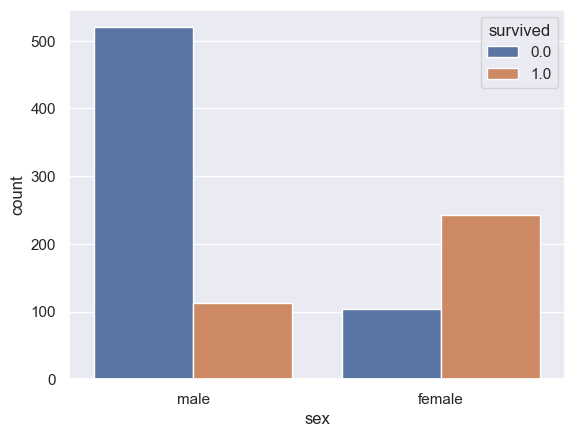

In [23]:
## Survived or not discerned by sex

sns.set_theme()
sns.countplot(df.sex, hue=df.survived)

### 2.4.1 Insight

Clearly survival rate of men was not even half as the men who passed as well as of the women's survival rate which totally makes sense as they would've prioritized others before themselves.

- Assuming that `passenger class` might had something to do with how many survived because it's very much possible that location played an important role to how many survived and likewise died.

<AxesSubplot:xlabel='pclass', ylabel='Count'>

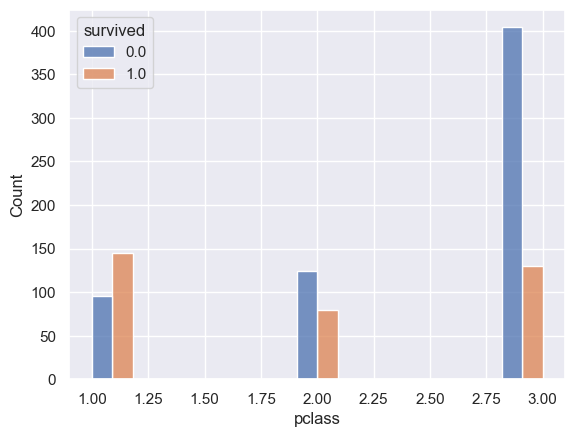

In [24]:
## Survived or not in regard to pclass's location

sns.histplot(df, x="pclass", hue="survived", multiple="dodge")

### 2.4.2 Insight

Was damn right with my hunch, turned out `pclass 3`'s location might have been somewhat in direct contact with the collision.

- Taking a wild guess (might sound somewhat ludicrous), but let's just see if higher fare availed the passengers somewhat more safety from the collision.

<AxesSubplot:xlabel='fare', ylabel='count'>

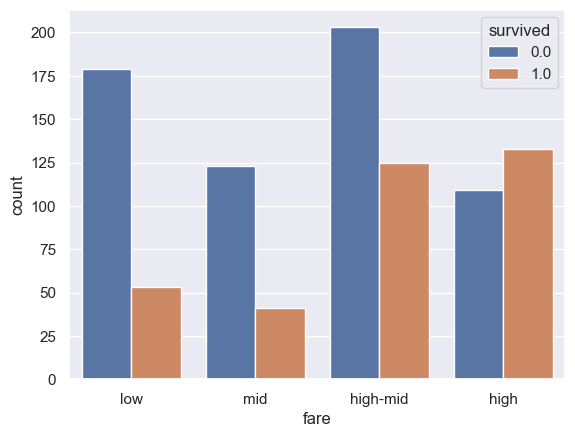

In [25]:
## Survived or not in regard to fare range

# Firstly, gotta classify the fare ranges as low, mid, high-mid and high
fare_cats = pd.cut(df.fare, bins=[0, 7.92, 12.5, 31, 500], 
                  labels=["low", "mid", "high-mid", "high"])

# plot
sns.countplot(fare_cats, hue=df.survived)

### 2.4.3 Insight

Assumption was quite right as it appears with increase in paying mid-high to higher fare, number of people survived sky-rocketed comparitively to the ones who paid lower to mid range fare.

- From where passengers embarked the titanic, shouldn't have any relation to how may people survived but let's give it a shot anyway.

Remember `Embarked` implies where the traveler mounted from. There are three possible values for Embark — `Southampton`, `Cherbourg`, and `Queenstown`.

<AxesSubplot:xlabel='embarked', ylabel='count'>

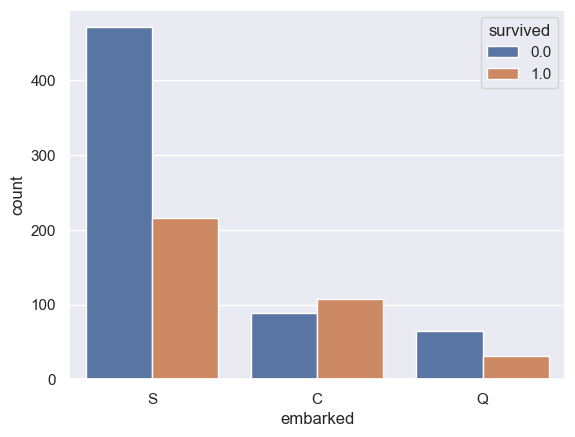

In [26]:
## Survived or not in regard to where people mebarked the titanic from

sns.countplot(df.embarked, hue=df.survived)

### 2.4.4 Insight

People who boarded from **Cherbourg** had a higher chance of survival than people who boarded from **Southampton** or **Queenstown**.

- This won't be an assumption, will check the survival chances based on age group.

<AxesSubplot:xlabel='age', ylabel='count'>

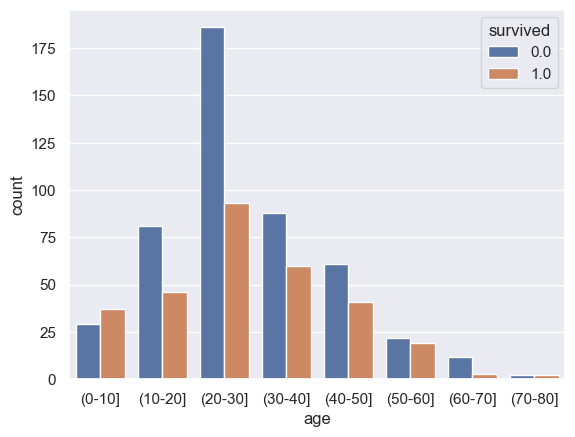

In [27]:
## Survival chances based on age groups

age_cats = pd.cut(df.age, 
                  bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], 
                  labels=["(0-10]", "(10-20]", "(20-30]", "(30-40]", "(40-50]", "(50-60]", 
                          "(60-70]", "(70-80]"])

# plot
sns.countplot(age_cats, hue=df.survived)

### 2.4.5 Insights

- Survival rate seems to be only increasing w the increase in the age. Almost in every age group except for the kids 0-10 one, casualties were greater than the number of people who survived.
- However, comparatively, the survival rate is least in the age group 20-30.

### 2.4.6 Seeing how's the survival rate, based on whether one came alone or with family

<AxesSubplot:xlabel='alone', ylabel='count'>

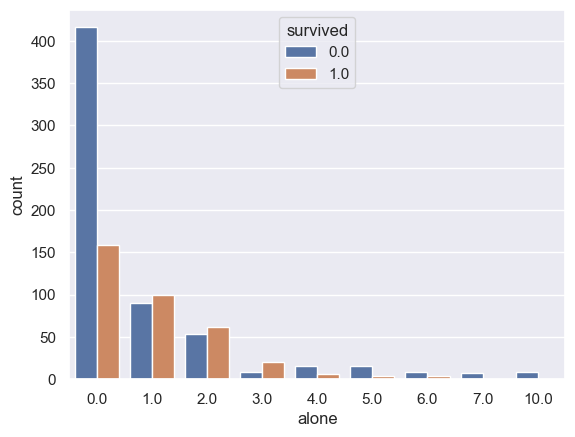

In [28]:
## before doing that, let's create a new feature combined of `sibsp` and `parch`
df['alone'] = df.sibsp + df.parch

# plot
sns.countplot(df.alone, hue=df.survived)

#### 2.4.6.1 Insight

Quite clearly, people who came alone, had better chances of surviving. Seemingly rest were busy helping their families out.

## 2.5 Handling Outliers

<AxesSubplot:>

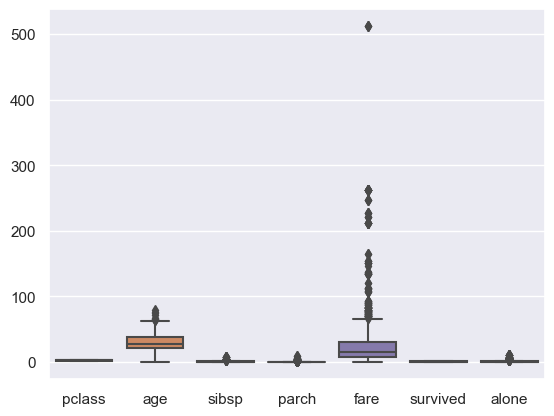

In [29]:
## Visualizing outliers we've got

sns.boxplot(data=df)

=> Let's not bother removing them for the fact they contain important information.

## 2.6 Data Preprocessing

In [30]:
df.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked',
       'survived', 'alone'],
      dtype='object')

In [31]:
## Create a pipline kinda method which combines the atts: `sibsp`, `parch`
# Combined att, `df.alone`: States whether one came w family or alone.

from sklearn.base import BaseEstimator, TransformerMixin

sibsp_idx, parch_idx = 1, 2

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_alone_attrib=True):
        self.add_alone_attrib = add_alone_attrib
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X = np.array(X)
        alone_attrib = X[:, sibsp_idx] + X[:, parch_idx]
        
        if self.add_alone_attrib:
            X = np.delete(X, [sibsp_idx, parch_idx], axis=1)
            return np.c_[X, alone_attrib]
        else:
            return X

In [32]:
## Build a pipeline for numerical atts

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline(steps=[('Simple Imputer', SimpleImputer(strategy="median")),
                              ('Attributes Adder', CombinedAttributesAdder()),
                              ('Scaler', StandardScaler())], verbose=2)
num_pipeline

Pipeline(steps=[('Simple Imputer', SimpleImputer(strategy='median')),
                ('Attributes Adder', CombinedAttributesAdder()),
                ('Scaler', StandardScaler())],
         verbose=2)

In [33]:
## Build a pipeline for categorical atts

from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline(steps=[('Simple Imputer', SimpleImputer(strategy="most_frequent")),
                              ('OneHot Encoder', OneHotEncoder(sparse=False))])
cat_pipeline

Pipeline(steps=[('Simple Imputer', SimpleImputer(strategy='most_frequent')),
                ('OneHot Encoder', OneHotEncoder(sparse=False))])

In [34]:
## Have a look at the Numerical and Categorical attributes

num_atts = ['age', 'sibsp', 'parch', 'fare']
cat_atts = ['pclass', 'sex', 'embarked']

print("Numerical Attributes: ", num_atts)
print("Categorical Attributes: ", cat_atts)

Numerical Attributes:  ['age', 'sibsp', 'parch', 'fare']
Categorical Attributes:  ['pclass', 'sex', 'embarked']


In [35]:
## Combine the `numerical` and `categorical` pipeline

from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline(steps=[('Simple Imputer', SimpleImputer(strategy="median")),
                              ('Attributes Adder', CombinedAttributesAdder()),
                              ('Scaler', StandardScaler())], verbose=2)

full_pipeline = ColumnTransformer([("num", num_pipeline, num_atts), 
                                  ("cat", cat_pipeline, cat_atts)])
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('Simple Imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('Attributes Adder',
                                                  CombinedAttributesAdder()),
                                                 ('Scaler', StandardScaler())],
                                          verbose=2),
                                 ['age', 'sibsp', 'parch', 'fare']),
                                ('cat',
                                 Pipeline(steps=[('Simple Imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OneHot Encoder',
                                                  OneHotEncoder(sparse=False))]),
                                 ['pclass', 'sex', 'embarked'])])

=> `preprocessing pipeline` ready to serve.

## 2.7 Testing different algorithms in quest to choose the best

In [36]:
## Preprocess the training data

X_arr = full_pipeline.fit_transform(X_train)
X_arr

[Pipeline] .... (step 1 of 3) Processing Simple Imputer, total=   0.0s
[Pipeline] .. (step 2 of 3) Processing Attributes Adder, total=   0.0s
[Pipeline] ............ (step 3 of 3) Processing Scaler, total=   0.0s


array([[ 0.70515144, -0.49143874, -0.56687216, ...,  0.        ,
         0.        ,  1.        ],
       [-1.82370269, -0.35127889,  0.66208163, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.81152512,  0.87686848,  0.66208163, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.04560213, -0.33498983, -0.56687216, ...,  0.        ,
         0.        ,  1.        ],
       [-0.24316886, -0.49088191, -0.56687216, ...,  0.        ,
         0.        ,  1.        ],
       [-0.08511548, -0.49143874, -0.56687216, ...,  0.        ,
         0.        ,  1.        ]])

In [37]:
## target label

y_train.value_counts().div(y_train.shape[0])

0.0    0.637105
1.0    0.362895
Name: survived, dtype: float64

### 2.7.1 Choosing the performance metric

Since, our data is not that `imbalanced` we're gonna go with **`accuracy`** metric.

* ### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
logistic_clf = LogisticRegression()

## Compute accuracy by cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=logistic_clf, X=X_arr, y=y_train, cv=10, verbose=3)
scores

[CV] END ................................ score: (test=0.828) total time=   0.0s
[CV] END ................................ score: (test=0.735) total time=   0.0s
[CV] END ................................ score: (test=0.755) total time=   0.0s
[CV] END ................................ score: (test=0.867) total time=   0.0s
[CV] END ................................ score: (test=0.765) total time=   0.0s
[CV] END ................................ score: (test=0.847) total time=   0.0s
[CV] END ................................ score: (test=0.786) total time=   0.0s
[CV] END ................................ score: (test=0.765) total time=   0.0s
[CV] END ................................ score: (test=0.827) total time=   0.0s
[CV] END ................................ score: (test=0.724) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


array([0.82828283, 0.73469388, 0.75510204, 0.86734694, 0.76530612,
       0.84693878, 0.78571429, 0.76530612, 0.82653061, 0.7244898 ])

In [39]:
## Logistic Clf score

logistic_clf_score = scores.mean()
logistic_clf_score

0.78997113997114

=> Not bad but lots of room for improvement.

* ### Support Vector Classifier (kernel="rbf")

In [40]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='rbf')

## Compute accuracy by cross validation

scores = cross_val_score(estimator=svm_clf, X=X_arr, y=y_train, cv=10, verbose=3)
scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] END ................................ score: (test=0.828) total time=   0.0s
[CV] END ................................ score: (test=0.796) total time=   0.0s
[CV] END ................................ score: (test=0.827) total time=   0.0s
[CV] END ................................ score: (test=0.867) total time=   0.0s
[CV] END ................................ score: (test=0.827) total time=   0.0s
[CV] END ................................ score: (test=0.857) total time=   0.0s
[CV] END ................................ score: (test=0.806) total time=   0.0s
[CV] END ................................ score: (test=0.786) total time=   0.0s
[CV] END ................................ score: (test=0.806) total time=   0.0s
[CV] END ................................ score: (test=0.735) total time=   0.0s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished


array([0.82828283, 0.79591837, 0.82653061, 0.86734694, 0.82653061,
       0.85714286, 0.80612245, 0.78571429, 0.80612245, 0.73469388])

In [41]:
## SVM Clf score

svm_clf_score = scores.mean()
svm_clf_score

0.813440527726242

=> Not much of the improvement as compared to prior classifier.

* ### Support Vector Classifier (kernel="linear")

In [42]:
from sklearn.svm import SVC
svm_lin_clf = SVC(gamma='auto')

## Compute accuracy by cross validation

scores = cross_val_score(estimator=svm_lin_clf, X=X_arr, y=y_train, cv=10, verbose=3)
scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] END ................................ score: (test=0.838) total time=   0.0s
[CV] END ................................ score: (test=0.816) total time=   0.0s
[CV] END ................................ score: (test=0.786) total time=   0.0s
[CV] END ................................ score: (test=0.888) total time=   0.0s
[CV] END ................................ score: (test=0.806) total time=   0.0s
[CV] END ................................ score: (test=0.857) total time=   0.0s
[CV] END ................................ score: (test=0.806) total time=   0.0s
[CV] END ................................ score: (test=0.755) total time=   0.0s
[CV] END ................................ score: (test=0.816) total time=   0.0s
[CV] END ................................ score: (test=0.735) total time=   0.0s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


array([0.83838384, 0.81632653, 0.78571429, 0.8877551 , 0.80612245,
       0.85714286, 0.80612245, 0.75510204, 0.81632653, 0.73469388])

In [43]:
## SVM `linear` Clf score

svm_lin_clf_score = scores.mean()
svm_lin_clf_score

0.8103689960832818

=> Nope, not gonna compromise.

* ### RandomForestClassifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

## Compute accuracy by cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=forest_clf, X=X_arr, y=y_train, cv=10, verbose=3)
scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.737) total time=   0.2s
[CV] END ................................ score: (test=0.765) total time=   0.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] END ................................ score: (test=0.837) total time=   0.1s
[CV] END ................................ score: (test=0.806) total time=   0.3s
[CV] END ................................ score: (test=0.786) total time=   0.2s
[CV] END ................................ score: (test=0.857) total time=   0.1s
[CV] END ................................ score: (test=0.796) total time=   0.2s
[CV] END ................................ score: (test=0.776) total time=   0.1s
[CV] END ................................ score: (test=0.745) total time=   0.1s
[CV] END ................................ score: (test=0.735) total time=   0.1s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.4s finished


array([0.73737374, 0.76530612, 0.83673469, 0.80612245, 0.78571429,
       0.85714286, 0.79591837, 0.7755102 , 0.74489796, 0.73469388])

In [45]:
## RandomForestClf score

forest_clf_score = scores.mean()
forest_clf_score

0.7839414553700268

=> Man, seriously even **RandomForestClassifier** ditched us?!

* ### XGBClassifier

In [46]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(random_state=42)

## Compute accuracy by cross validation

scores = cross_val_score(estimator=xgb_clf, X=X_arr, y=y_train, cv=10, verbose=3)
scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] END ................................ score: (test=0.758) total time=   0.1s
[CV] END ................................ score: (test=0.816) total time=   0.1s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] END ................................ score: (test=0.827) total time=   0.0s
[CV] END ................................ score: (test=0.847) total time=   0.0s
[CV] END ................................ score: (test=0.776) total time=   0.0s
[CV] END ................................ score: (test=0.867) total time=   0.0s
[CV] END ................................ score: (test=0.816) total time=   0.0s
[CV] END ................................ score: (test=0.735) total time=   0.0s
[CV] END ................................ score: (test=0.755) total time=   0.0s
[CV] END ................................ score: (test=0.745) total time=   0.0s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.3s finished


array([0.75757576, 0.81632653, 0.82653061, 0.84693878, 0.7755102 ,
       0.86734694, 0.81632653, 0.73469388, 0.75510204, 0.74489796])

In [47]:
## XGBClf score

xgb_clf_score = scores.mean()
xgb_clf_score

0.7941249226963512

**=>** So `SVC` performed exemplary among the lot with  81.344% accuracy.

## 2.8 Evaluation on Test set

In [50]:
## Pass the test set throught the preprocessing pipeline

X_test_arr = full_pipeline.transform(X_test)

In [52]:
## Make predictions using the best model for analyzing its accuracy 

best_mod = svm_clf
best_mod.fit(X_arr, y_train)

y_pred = best_mod.predict(X_test_arr)

In [53]:
## Analyze accuracy of the best model on this test array

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7896341463414634

=> Shit! even the best one overfits!